This would give you two class, groupQuery and ctlDevice

In [1]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    from AwakeDevice import *
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [2]:
#"some common devices in AWAKE"

BPM11 = "TT43.BPM.430010/LastAcq#verPos"
BPM12 = "TT43.BPM.430010/LastAcq#horPos"
BPM13 = "TT43.BPM.430010/LastAcq#sigma"

BPM21 = "TT43.BPM.430028/LastAcq#verPos"
BPM22 = "TT43.BPM.430028/LastAcq#horPos"
BPM23 = "TT43.BPM.430028/LastAcq#sigma"

BPM31 = "TT43.BPM.430039/LastAcq#verPos"
BPM32 = "TT43.BPM.430039/LastAcq#horPos"
BPM33 = "TT43.BPM.430039/LastAcq#sigma"

Corrector1H = "RPCAH.TSG4.RCIBH.430011/SettingPPM#current"
Corrector1V = "RPCAH.TSG4.RCIBV.430011/SettingPPM#current"

Corrector2H = "RPCAH.TSG4.RCIBH.412353/SettingPPM#current"
Corrector2V = "RPCAH.TSG4.RCIBV.412353/SettingPPM#current"

Cathod_img = 'BOVWA.01TCV4.CAM8/CameraImage#image'
BTV_img = 'BOVWA.02TCV4.CAM9/CameraImage#image'

solenoid_set = "RPSKN.TSG4.SNJ.430001/SettingPPM#current"
solenoid_acq = "RPSKN.TSG4.SNJ.430001/Acquisition#currentAverage"
Solenoid = ctlDevice(solenoid_set, solenoid_acq)

Quad02_set  = 'rmi://virtual_sps/logical.RQIF.430034/K'
Quad02_acq  = 'RPCAH.TSG4.RQIF.430034/Acquisition#currentAverage'
Quad02 = ctlDevice(Quad02_set, Quad02_acq)

In [3]:
# todo, imeplemtn a group
g1 = groupQuery([
#     BPM11,
#     BPM12,
#     BPM13,
#     BPM21,
#     BPM22,
#     BPM23,
#     BPM31,
#     BPM32,
#     BPM33,
    Corrector1H,
    Corrector1V,
    Corrector2H,
    Corrector2V,
    solenoid_acq,
    BTV_img,
    Cathod_img,
    ],
    {"Solenoid": Solenoid, "Quad": Quad02},
    groupName="Solenoid_Quad_WG_430_scan_with_150pc_" #the group name will be used when saving .5 file
    );

INFO:cmmnbuild_dep_manager:Package "pyjapc" is not yet set up - installing and resolving JARs
INFO:cmmnbuild_dep_manager:using resolver: CbngWebResolver (CBNG Web Service)
INFO:cmmnbuild_dep_manager:starting a JPype JVM with 133 jars from /afs/cern.ch/user/j/jiling/.local/lib/python3.6/site-packages/cmmnbuild_dep_manager/lib


In [4]:
g1.acqList

['RPCAH.TSG4.RCIBH.430011/SettingPPM#current',
 'RPCAH.TSG4.RCIBV.430011/SettingPPM#current',
 'RPCAH.TSG4.RCIBH.412353/SettingPPM#current',
 'RPCAH.TSG4.RCIBV.412353/SettingPPM#current',
 'RPSKN.TSG4.SNJ.430001/Acquisition#currentAverage',
 'BOVWA.02TCV4.CAM9/CameraImage#image',
 'BOVWA.01TCV4.CAM8/CameraImage#image']

In [5]:
# g1.set_and_wait("Quad", 10, epsilon=0.1)

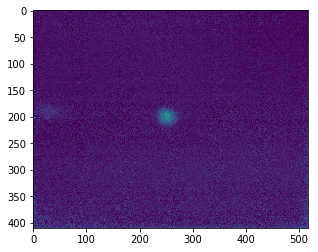

In [6]:
res = g1.getAll() # this get's one set of all params
plt.imshow(res[Cathod_img]);

In [7]:
# enumerate all parameters we wan to set and each value
sole_list = []
QuadK = []
for s in np.linspace(165, 190, 6):
    for k in np.linspace(0, 40, 11):
        QuadK.append(k)
        sole_list.append(s)
# sole_list
len(QuadK)

66

In [ ]:
scanDict = {"Solenoid": sole_list, "Quad": QuadK}
# Plan_B will be (datas, paras, specs) tuple in case .h5 save failed
Plan_B = g1.scantoH5(scanDict, nShots=10, squashShots = False, dry_run=False, record_BPM=True); # ---------> this saves a h5 file, dry_run will not actually set the machine

In [9]:
if Plan_B == None:
    print("Congrats! .h5 saved")

Congrats! .h5 saved


In [ ]:
f = h5py.File("Sole_Btv_Fc1565455644.h5", 'r')

In [ ]:
list(f.keys())

In [ ]:
plt.imshow(f['BOVWA.01TCV4.CAM8'].value[0,0,:,:])

In [ ]:
# plt.imshow(np.mean(f['BOVWA.01TCV4.CAM8'].value, axis=1)[0,:,:])

In [ ]:
f['Specs'].value

In [ ]:
f.close()